# Exchange Rate British Pound \ US$

In [101]:
#import library 
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt

In [102]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

<ipython-input-102-9174b814a709>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [103]:
#get data
#def GetData(fileName):
    #return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

In [106]:
#read time series from the exchange.csv file 
df = pd.read_csv('exchange.csv')

In [107]:
from statsmodels.tsa.stattools import adfuller

X = df['GBP/USD Close'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.967030
p-value: 0.301214
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


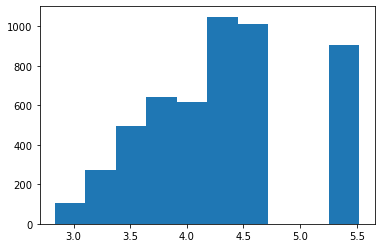

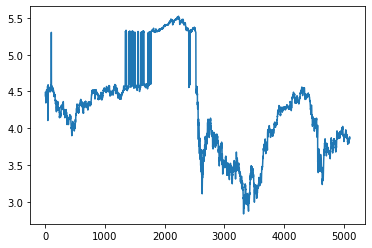

In [108]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import log
df = read_csv('exchange.csv', header=0, index_col=0)
X = df.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [109]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import log
df = read_csv('exchange.csv', header=0, index_col=0)
X =df.values
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4.752072, mean2=3.812237
variance1=0.231669, variance2=0.160373


In [110]:
# Making datset Stationary

In [111]:
df = df.diff()

In [112]:
df

,GBP/USD Close
Date,
1998-12-31,NaN
1999-01-01,0.00
1999-01-04,-3.07
1999-01-05,-1.65
1999-01-06,3.01
...,...
2018-07-12,0.61
2018-07-13,-0.03
2018-07-16,0.00


In [113]:
df = df.diff().dropna()

In [114]:
df

,GBP/USD Close
Date,
1999-01-04,-3.07
1999-01-05,1.42
1999-01-06,4.66
1999-01-07,-6.85
1999-01-08,3.09
...,...
2018-07-12,0.24
2018-07-13,-0.64
2018-07-16,0.03


In [115]:
#view top 10 records
df.head(10)

,GBP/USD Close
Date,
1999-01-04,-3.07
1999-01-05,1.42
1999-01-06,4.66
1999-01-07,-6.85
1999-01-08,3.09
1999-01-11,-4.59
1999-01-12,11.75
1999-01-13,-3.39
1999-01-14,-1.54


In [116]:
df = pd.DataFrame(df)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5098 entries, 1999-01-04 to 2018-07-18
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GBP/USD Close  5098 non-null   float64
dtypes: float64(1)
memory usage: 79.7+ KB


In [118]:
#view basic stats information on data
df.describe()

,GBP/USD Close
count,5098.000000
mean,-0.000133
std,15.410325
min,-202.960000
25%,-1.030000
50%,-0.048000
75%,0.990000
max,205.610000


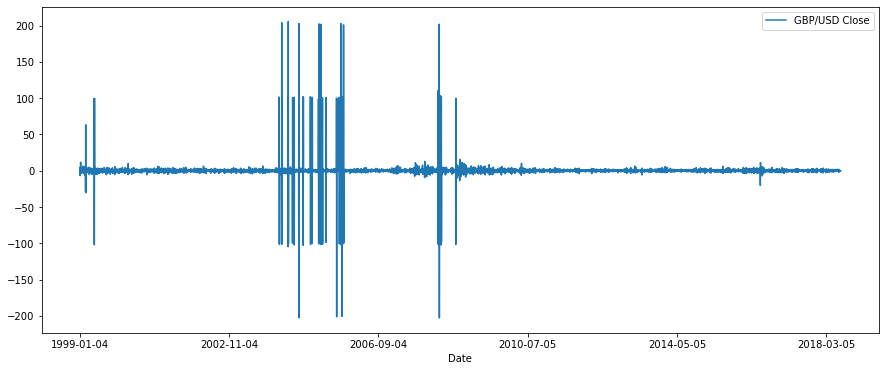

In [119]:
#plot the time series data
df.plot(figsize=(15, 6))
plt.show()

In [120]:
from pandas.plotting import autocorrelation_plot

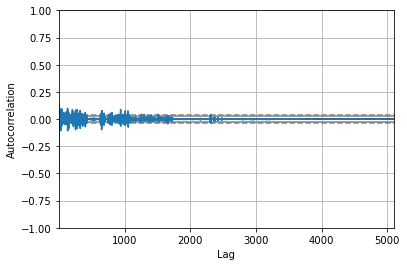

In [121]:
autocorrelation_plot(df)
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B3591B23A0>]],
      dtype=object)

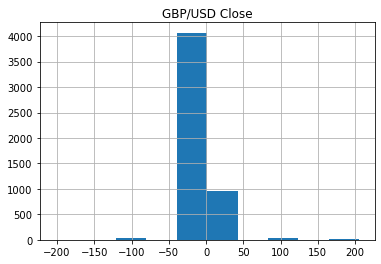

In [122]:
#Histogram
df.hist()

In [123]:
from statsmodels.tsa.stattools import adfuller

X = df['GBP/USD Close'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.485172
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


# ARIMA With StatsModels Package

In [124]:
from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

#predict next value
predicted = StartARIMAForecasting(df, 1,1,0)

#display the value
print('Predicted=%f' % (predicted))

E:\anacona\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
E:\anacona\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


Predicted=-0.383512


# ARIMA In Python To Forecast Exchange Rates

In [125]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction
    
#Get exchange rates
ActualData = GetData('exchange.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 3,1,0)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)


Actual=25.703000, Predicted=24.576403
Actual=25.211000, Predicted=25.332254
Actual=25.110000, Predicted=25.111076
Actual=24.872000, Predicted=25.226221
Actual=25.363000, Predicted=24.936622
Actual=25.170000, Predicted=25.239777
Actual=27.179000, Predicted=25.092937
Actual=27.836000, Predicted=26.591630
Actual=27.985000, Predicted=27.171867
Actual=27.105000, Predicted=27.780564
Actual=26.920000, Predicted=27.315169
Actual=26.985000, Predicted=27.143039
Actual=26.249000, Predicted=26.975665
Actual=25.962000, Predicted=26.429681
Actual=25.566000, Predicted=26.183523
Actual=25.989000, Predicted=25.718160
Actual=25.758000, Predicted=25.920293
Actual=25.783000, Predicted=25.706838
Actual=26.084000, Predicted=25.801638
Actual=26.210000, Predicted=25.960350
Actual=27.010000, Predicted=26.080079
Actual=26.853000, Predicted=26.716712
Actual=25.614000, Predicted=26.700089
Actual=25.077000, Predicted=25.999556
Actual=25.090000, Predicted=25.482577
Actual=25.618000, Predicted=25.170893
Actual=25.98

Actual=50.713000, Predicted=51.291342
Actual=50.987000, Predicted=51.138068
Actual=50.215000, Predicted=50.892494
Actual=49.590000, Predicted=50.372309
Actual=50.290000, Predicted=49.932970
Actual=50.060000, Predicted=50.196645
Actual=49.996000, Predicted=49.958015
Actual=50.151000, Predicted=50.053708
Actual=51.514000, Predicted=50.101925
Actual=52.850000, Predicted=51.054343
Actual=53.170000, Predicted=52.136114
Actual=52.805000, Predicted=52.774300
Actual=52.980000, Predicted=52.837499
Actual=53.580000, Predicted=52.994525
Actual=52.766000, Predicted=53.345308
Actual=51.116000, Predicted=52.866922
Actual=50.195000, Predicted=51.779316
Actual=49.369000, Predicted=50.813974
Actual=48.947000, Predicted=49.795582
Actual=50.550000, Predicted=49.234487
Actual=51.020000, Predicted=50.140047
Actual=50.990000, Predicted=50.511172
Actual=50.000000, Predicted=50.889396
Actual=49.440000, Predicted=50.292004
Actual=50.180000, Predicted=49.809519
Actual=49.244000, Predicted=50.059359
Actual=49.53

Actual=72.210000, Predicted=72.482796
Actual=72.560000, Predicted=72.347216
Actual=72.643000, Predicted=72.506240
Actual=72.014000, Predicted=72.534308
Actual=71.534000, Predicted=72.180944
Actual=72.337000, Predicted=71.810070
Actual=72.050000, Predicted=72.190817
Actual=70.655000, Predicted=71.952551
Actual=70.514000, Predicted=71.135244
Actual=70.775000, Predicted=70.853050
Actual=70.560000, Predicted=70.713647
Actual=70.660000, Predicted=70.560377
Actual=71.392000, Predicted=70.671499
Actual=71.665000, Predicted=71.142234
Actual=71.600000, Predicted=71.417120
Actual=71.643000, Predicted=71.557312
Actual=71.399000, Predicted=71.639343
Actual=70.206000, Predicted=71.456432
Actual=70.053000, Predicted=70.612068
Actual=70.636000, Predicted=70.351598
Actual=71.510000, Predicted=70.481242
Actual=71.671000, Predicted=71.112333
Actual=71.954000, Predicted=71.428261
Actual=72.275000, Predicted=71.831804
Actual=72.330000, Predicted=72.111289
Actual=72.172000, Predicted=72.238742
Actual=71.46

Actual=83.941000, Predicted=84.455499
Actual=82.738000, Predicted=84.145991
Actual=83.014000, Predicted=83.235066
Actual=81.636000, Predicted=83.188421
Actual=83.398000, Predicted=81.982066
Actual=82.422000, Predicted=83.168047
Actual=81.315000, Predicted=82.322164
Actual=80.490000, Predicted=81.867650
Actual=78.975000, Predicted=80.972202
Actual=80.070000, Predicted=79.602113
Actual=78.918000, Predicted=80.063946
Actual=80.018000, Predicted=79.014760
Actual=77.840000, Predicted=79.940911
Actual=79.439000, Predicted=78.245967
Actual=79.134000, Predicted=79.435412
Actual=77.773000, Predicted=78.862591
Actual=77.734000, Predicted=78.253569
Actual=77.187000, Predicted=78.037453
Actual=77.180000, Predicted=77.349322
Actual=77.789000, Predicted=77.297326
Actual=77.983000, Predicted=77.600715
Actual=77.360000, Predicted=77.788002
Actual=77.454000, Predicted=77.504379
Actual=77.410000, Predicted=77.558792
Actual=77.918000, Predicted=77.395712
Actual=78.373000, Predicted=77.771483
Actual=78.58

Actual=78.680000, Predicted=78.769952
Actual=77.140000, Predicted=78.759670
Actual=77.140000, Predicted=77.565784
Actual=75.690000, Predicted=77.472731
Actual=74.570000, Predicted=76.113782
Actual=73.280000, Predicted=75.218281
Actual=71.880000, Predicted=73.899478
Actual=70.668000, Predicted=72.570820
Actual=71.280000, Predicted=71.324943
Actual=70.005000, Predicted=71.347162
Actual=70.190000, Predicted=70.242426
Actual=70.242000, Predicted=70.409369
Actual=66.660000, Predicted=70.173270
Actual=67.460000, Predicted=67.719305
Actual=66.628000, Predicted=67.993554
Actual=65.817000, Predicted=66.677726
Actual=67.160000, Predicted=66.238764
Actual=69.570000, Predicted=66.921474
Actual=68.595000, Predicted=68.542036
Actual=70.037000, Predicted=68.363100
Actual=68.862000, Predicted=69.822386
Actual=70.587000, Predicted=68.889269
Actual=72.503000, Predicted=70.325997
Actual=74.850000, Predicted=71.539411
Actual=72.951000, Predicted=73.731204
Actual=71.900000, Predicted=73.015151
Actual=70.17

E:\anacona\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Actual=30.773000, Predicted=30.664378
Actual=31.610000, Predicted=30.661138
Actual=30.961000, Predicted=31.331808
Actual=31.670000, Predicted=30.955054
Actual=32.233000, Predicted=31.584440
Actual=32.866000, Predicted=31.888016
Actual=32.548000, Predicted=32.539349
Actual=33.670000, Predicted=32.490472
Actual=33.668000, Predicted=33.388145
Actual=34.717000, Predicted=33.404944
Actual=35.784000, Predicted=34.391322
Actual=37.005000, Predicted=35.218618
Actual=38.205000, Predicted=36.395634
Actual=37.600000, Predicted=37.568965
Actual=37.092000, Predicted=37.510523
Actual=35.701000, Predicted=37.365681
Actual=36.326000, Predicted=36.208153
Actual=36.335000, Predicted=36.421278
Actual=35.770000, Predicted=36.171825
Actual=35.454000, Predicted=35.923705
Actual=35.440000, Predicted=35.654406
Actual=35.289000, Predicted=35.492564
Actual=33.263000, Predicted=35.318284
Actual=32.703000, Predicted=33.885398
Actual=32.123000, Predicted=33.292538
Actual=30.815000, Predicted=32.389350
Actual=31.89

Actual=41.470000, Predicted=39.639176
Actual=41.714000, Predicted=41.063833
Actual=42.031000, Predicted=41.260124
Actual=40.767000, Predicted=41.877674
Actual=41.077000, Predicted=41.063472
Actual=41.197000, Predicted=41.245670
Actual=41.526000, Predicted=41.071953
Actual=42.307000, Predicted=41.388360
Actual=43.802000, Predicted=41.987658
Actual=45.104000, Predicted=43.172045
Actual=45.638000, Predicted=44.379683
Actual=46.400000, Predicted=45.189947
Actual=46.813000, Predicted=46.049658
Actual=46.390000, Predicted=46.513630
Actual=46.350000, Predicted=46.418164
Actual=46.800000, Predicted=46.443056
Actual=46.903000, Predicted=46.658498
Actual=46.855000, Predicted=46.761204
Actual=46.315000, Predicted=46.836545
Actual=45.785000, Predicted=46.474742
Actual=46.585000, Predicted=46.047640
Actual=47.391000, Predicted=46.444350
Actual=46.992000, Predicted=46.959906
Actual=46.089000, Predicted=46.928002
Actual=45.590000, Predicted=46.437629
Actual=45.279000, Predicted=45.920230
Actual=44.31

Actual=52.870000, Predicted=52.291073
Actual=53.430000, Predicted=52.533634
Actual=52.870000, Predicted=53.172336
Actual=52.340000, Predicted=52.907714
Actual=51.260000, Predicted=52.612759
Actual=50.700000, Predicted=51.684485
Actual=51.370000, Predicted=51.088127
Actual=51.800000, Predicted=51.273808
Actual=52.370000, Predicted=51.511603
Actual=52.250000, Predicted=52.098793
Actual=50.260000, Predicted=52.153756
Actual=50.280000, Predicted=50.874081
Actual=49.500000, Predicted=50.694153
Actual=49.030000, Predicted=49.706683
Actual=48.160000, Predicted=49.328576
Actual=47.770000, Predicted=48.506386
Actual=47.870000, Predicted=48.061047
Actual=47.520000, Predicted=47.907803
Actual=48.670000, Predicted=47.588781
Actual=47.830000, Predicted=48.390168
Actual=48.020000, Predicted=47.817883
Actual=48.810000, Predicted=48.139859
Actual=48.817000, Predicted=48.515570
Actual=49.398000, Predicted=48.632601
Actual=49.957000, Predicted=49.215187
Actual=49.181000, Predicted=49.651934
Actual=49.17

In [126]:
#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

Test Mean Squared Error (smaller the better fit): 1.551


In [127]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [128]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(TestData, Predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.246


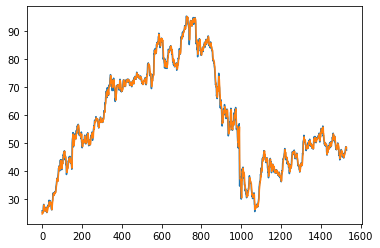

In [129]:
# plot
plt.plot(TestData)
plt.plot(Predictions)
plt.show()

# Implementing Moving Average on Exchange Rate Data
Simple Moving Average (SMA)

In [130]:
import numpy as pd
import pandas as pd

In [131]:
df2 = pd.read_csv('exchange.csv')

In [132]:
df2.head()

,Date,GBP/USD Close
0,1998-12-31,88.67
1,1999-01-01,88.67
2,1999-01-04,85.60
3,1999-01-05,83.95
4,1999-01-06,86.96


In [133]:
#calculate SMA for a window size of 3
for i in range(0,df.shape[0]-2):
    df2.loc[df2.index[i+2],'SMA_3'] = np.round(((df2.iloc[i,1]+ df2.iloc[i+1,1] +df2.iloc[i+2,1])/3),1)

In [134]:
df2.head()

,Date,GBP/USD Close,SMA_3
0,1998-12-31,88.67,NaN
1,1999-01-01,88.67,NaN
2,1999-01-04,85.60,87.6
3,1999-01-05,83.95,86.1
4,1999-01-06,86.96,85.5


For a sanity check, let's also use the pandas in-built rolling function and
see if it matches with our custom python based simple moving average.

In [135]:
df2['pandas_SMA_3'] = df2.iloc[:,1].rolling(window=3).mean()

In [136]:
df2.head()  #means your implementation of SMA was correct.

,Date,GBP/USD Close,SMA_3,pandas_SMA_3
0,1998-12-31,88.67,NaN,NaN
1,1999-01-01,88.67,NaN,NaN
2,1999-01-04,85.60,87.6,87.646667
3,1999-01-05,83.95,86.1,86.073333
4,1999-01-06,86.96,85.5,85.503333


calculate the simple moving average for a window_size of 4.

In [137]:
for i in range(0,df.shape[0]-3):
    df2.loc[df2.index[i+3],'SMA_4'] = np.round(((df2.iloc[i,1]+ df2.iloc[i+1,1] +df2.iloc[i+2,1]+df2.iloc[i+3,1])/4),1)

In [138]:
df2.head()

,Date,GBP/USD Close,SMA_3,pandas_SMA_3,SMA_4
0,1998-12-31,88.67,NaN,NaN,NaN
1,1999-01-01,88.67,NaN,NaN,NaN
2,1999-01-04,85.60,87.6,87.646667,NaN
3,1999-01-05,83.95,86.1,86.073333,86.7
4,1999-01-06,86.96,85.5,85.503333,86.3


In [139]:
df2['pandas_SMA_4'] = df2.iloc[:,1].rolling(window=4).mean()

In [140]:
df2.head()

,Date,GBP/USD Close,SMA_3,pandas_SMA_3,SMA_4,pandas_SMA_4
0,1998-12-31,88.67,NaN,NaN,NaN,NaN
1,1999-01-01,88.67,NaN,NaN,NaN,NaN
2,1999-01-04,85.60,87.6,87.646667,NaN,NaN
3,1999-01-05,83.95,86.1,86.073333,86.7,86.7225
4,1999-01-06,86.96,85.5,85.503333,86.3,86.2950


 plot the data of the moving averages that you calculated.

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

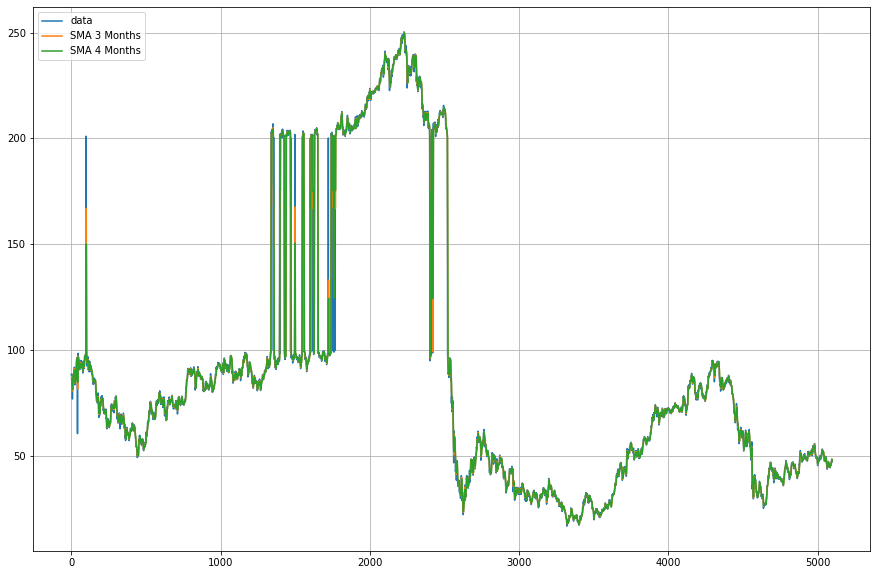

In [55]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df2['GBP/USD Close'],label='data')
plt.plot(df2['SMA_3'],label='SMA 3 Months')
plt.plot(df2['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

Cumulative Moving Average

In [56]:
df3 = pd.read_csv('exchange.csv')

In [57]:
df3.head()

,Date,GBP/USD Close
0,1998-12-31,88.67
1,1999-01-01,88.67
2,1999-01-04,85.60
3,1999-01-05,83.95
4,1999-01-06,86.96


In [58]:
df3['CMA_4'] = df3.expanding(min_periods=4).mean()

In [59]:
df3.head()

,Date,GBP/USD Close,CMA_4
0,1998-12-31,88.67,NaN
1,1999-01-01,88.67,NaN
2,1999-01-04,85.60,NaN
3,1999-01-05,83.95,86.7225
4,1999-01-06,86.96,86.7700


 plot the actual GBP/USD Close and the cumulative moving average 

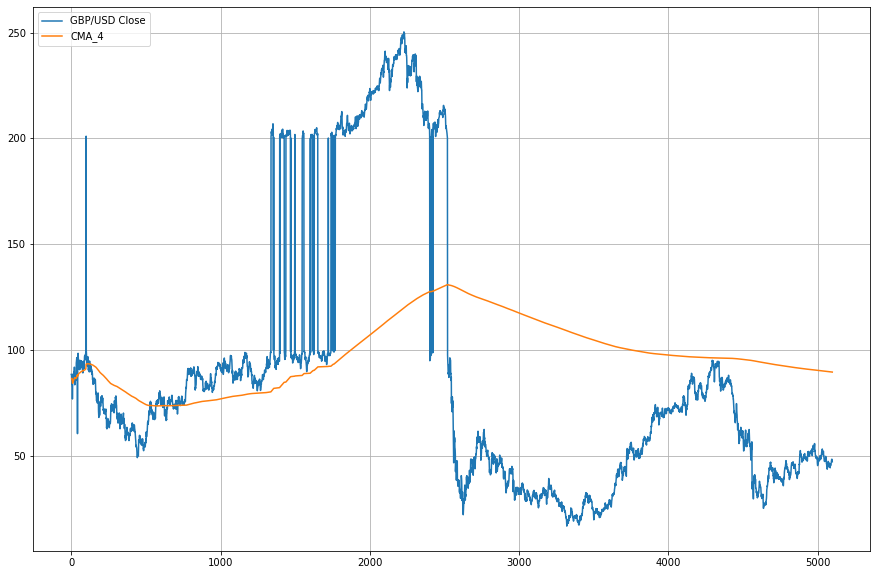

In [60]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df3['GBP/USD Close'],label='GBP/USD Close')
plt.plot(df3['CMA_4'],label='CMA_4')
plt.legend(loc=2)

Exponential Moving Average

In [61]:
df3['EMA'] = df3.iloc[:,1].ewm(span=40,adjust=False).mean()

In [62]:
df3.head()

,Date,GBP/USD Close,CMA_4,EMA
0,1998-12-31,88.67,NaN,88.670000
1,1999-01-01,88.67,NaN,88.670000
2,1999-01-04,85.60,NaN,88.520244
3,1999-01-05,83.95,86.7225,88.297305
4,1999-01-06,86.96,86.7700,88.232071


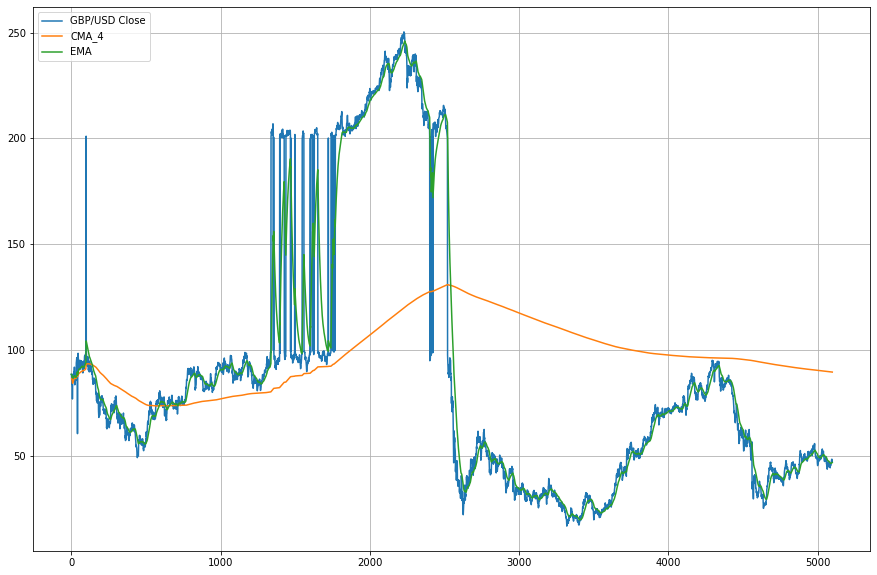

In [63]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df3['GBP/USD Close'],label='GBP/USD Close')
plt.plot(df3['CMA_4'],label='CMA_4')
plt.plot(df3['EMA'],label='EMA')
plt.legend(loc=2)

# Moving Average method

In [66]:
#Importing data
df = pd.read_csv('exchange.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0],squeeze=True)
#Printing head
df.head()

Date
1998-12-31    88.67
1999-01-01    88.67
1999-01-04    85.60
1999-01-05    83.95
1999-01-06    86.96
Name: GBP/USD Close, dtype: float64

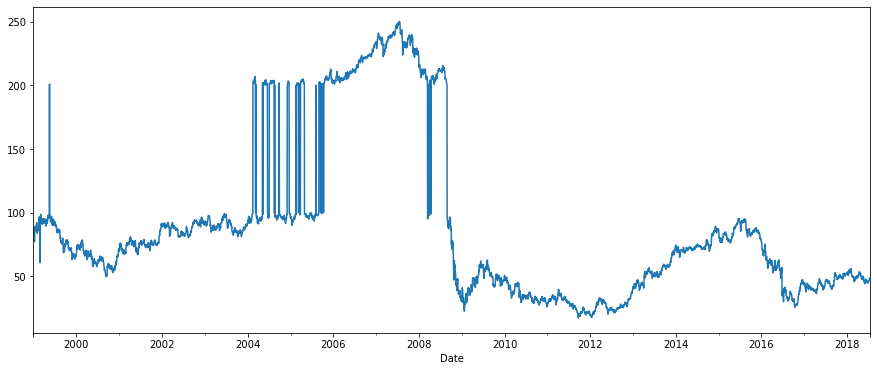

In [67]:
df.plot(figsize=(15, 6))
pyplot.show()

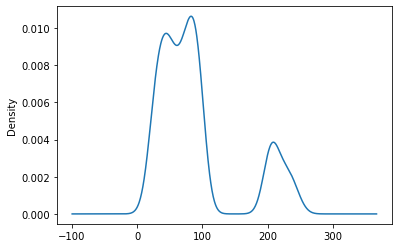

In [68]:
df.plot(kind='kde')
pyplot.show()

In [69]:
df = df.diff()

In [70]:
df = df.diff().dropna()

In [71]:
df.head()

Date
1999-01-04   -3.07
1999-01-05    1.42
1999-01-06    4.66
1999-01-07   -6.85
1999-01-08    3.09
Name: GBP/USD Close, dtype: float64

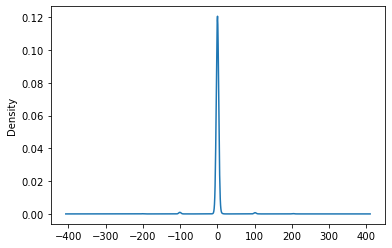

In [73]:
df.plot(kind='kde')
pyplot.show()

In [76]:
df = pd.DataFrame(df)

In [77]:
#Creating train and test set 

train=df[0:3570] 
test=df[3570:]


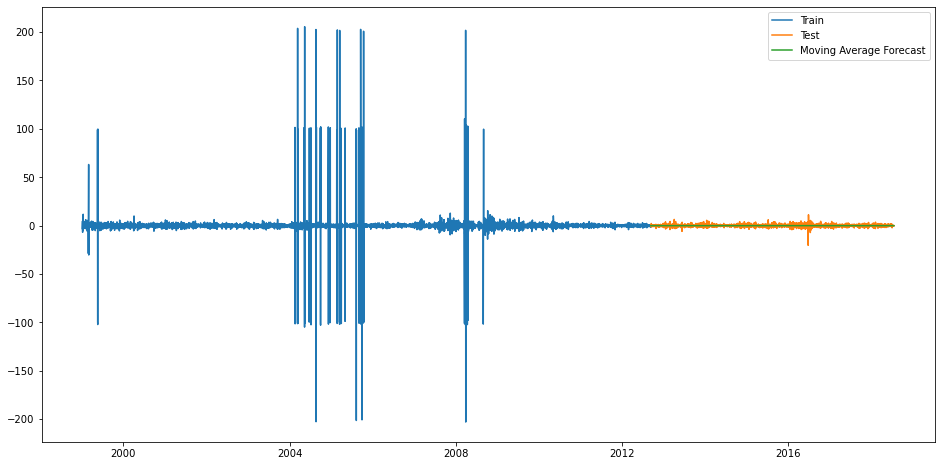

In [78]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train["GBP/USD Close"].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train["GBP/USD Close"], label='Train')
plt.plot(test["GBP/USD Close"], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [79]:
y_hat_avg

,GBP/USD Close,moving_avg_forecast
Date,,
2012-09-10,0.391,-0.00995
2012-09-11,-0.137,-0.00995
2012-09-12,0.729,-0.00995
2012-09-13,-0.684,-0.00995
2012-09-14,2.202,-0.00995
...,...,...
2018-07-12,0.240,-0.00995
2018-07-13,-0.640,-0.00995
2018-07-16,0.030,-0.00995


In [80]:
residuals= y_hat_avg["GBP/USD Close"]-y_hat_avg["moving_avg_forecast"]

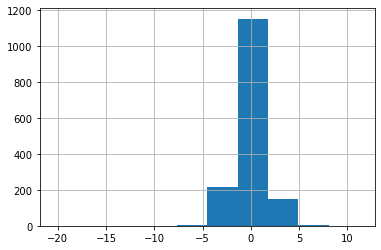

In [81]:
residuals.hist()
pyplot.show()

In [82]:
rms = sqrt(mean_squared_error(test["GBP/USD Close"], y_hat_avg.moving_avg_forecast))
print(rms)

1.5733928999723004


# Holt-Winters Exponential Smoothing in Python

In [83]:
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [84]:
df4 = read_csv('exchange.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [85]:
df4.head()

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96


In [86]:
df4 = df4.diff() 

In [87]:
df4

,GBP/USD Close
Date,
1998-12-31,NaN
1999-01-01,0.00
1999-01-04,-3.07
1999-01-05,-1.65
1999-01-06,3.01
...,...
2018-07-12,0.61
2018-07-13,-0.03
2018-07-16,0.00


In [88]:
df4 = df4.diff().dropna()

In [89]:
df4

,GBP/USD Close
Date,
1999-01-04,-3.07
1999-01-05,1.42
1999-01-06,4.66
1999-01-07,-6.85
1999-01-08,3.09
...,...
2018-07-12,0.24
2018-07-13,-0.64
2018-07-16,0.03


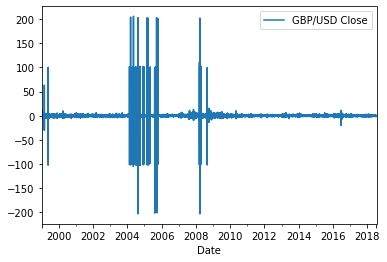

In [90]:
#plot the data
df4.plot()
plt.show()

In [91]:
#split between the training and the test data sets. The last 12 periods form the test data
train = df4.iloc[:3570]
test = df4.iloc[3570:]

In [94]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

E:\anacona\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
E:\anacona\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
E:\anacona\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


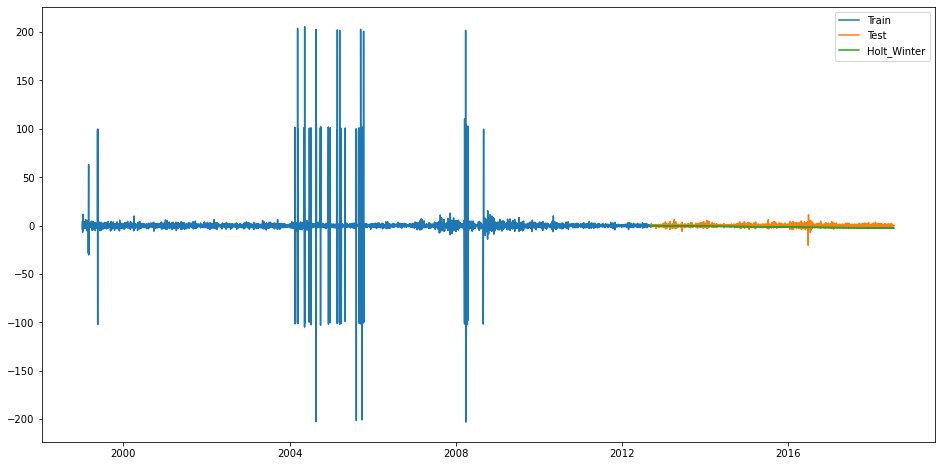

In [95]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['GBP/USD Close']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['GBP/USD Close'], label='Train')
plt.plot(test['GBP/USD Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [98]:
rms = sqrt(mean_squared_error(test["GBP/USD Close"], y_hat_avg.Holt_Winter))
print(rms)

2.2012872708554525


<Figure size 1080x720 with 0 Axes>

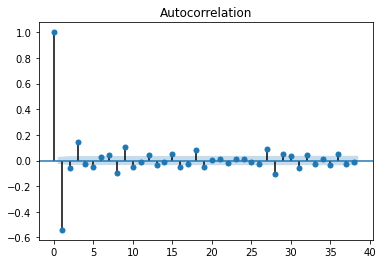

In [99]:
#Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=[15,10])
plot_acf(df4)
plt.show()

<Figure size 1080x720 with 0 Axes>

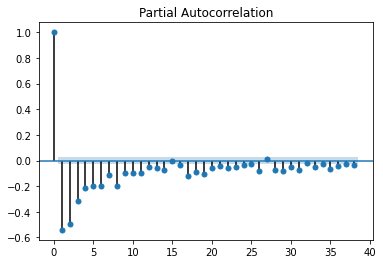

In [100]:
#plot Pacf
from statsmodels.graphics.tsaplots import plot_pacf
fig = plt.figure(figsize=[15,10])
plot_pacf(df4)
plt.show()

# Weighted Average Method

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv('exchange.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
#Printing head
df.head()

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96


In [31]:
df = df.diff() 

In [32]:
df

,GBP/USD Close
Date,
1998-12-31,NaN
1999-01-01,0.00
1999-01-04,-3.07
1999-01-05,-1.65
1999-01-06,3.01
...,...
2018-07-12,0.61
2018-07-13,-0.03
2018-07-16,0.00


In [33]:
df = df.diff().dropna()

In [34]:
df

,GBP/USD Close
Date,
1999-01-04,-3.07
1999-01-05,1.42
1999-01-06,4.66
1999-01-07,-6.85
1999-01-08,3.09
...,...
2018-07-12,0.24
2018-07-13,-0.64
2018-07-16,0.03


In [35]:
#Creating train and test set 

train=df[0:3570] 
test=df[3570:]

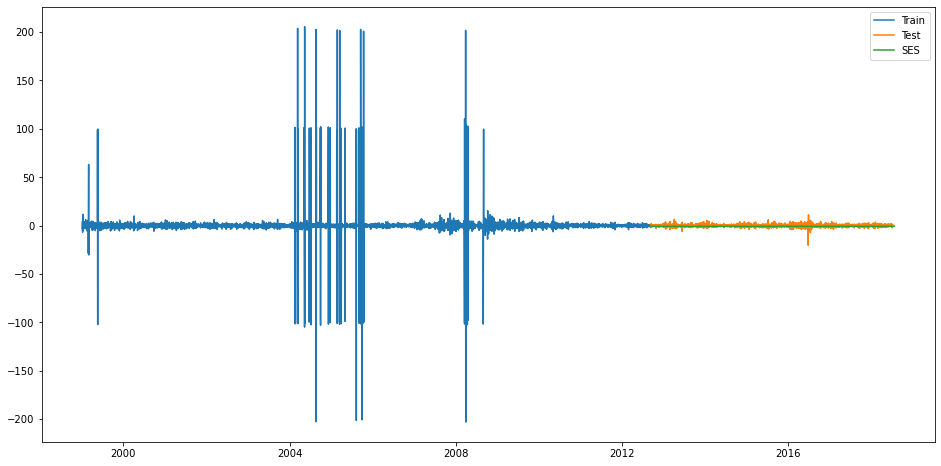

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['GBP/USD Close'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['GBP/USD Close'], label='Train')
plt.plot(test['GBP/USD Close'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [39]:
rms = sqrt(mean_squared_error(test["GBP/USD Close"], y_hat_avg.SES))
print(rms)

1.720369233233093
